<a href="https://colab.research.google.com/github/jxblrkrstffrbrms/ITBA3206-SPARTACUS/blob/main/Reaching_New_Heights_Boosting_Vaccinations_for_a_Safer_Community.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reaching New Heights : Boosting Vaccinations for a Safer Community**

---



The goal of this analysis is to examine the current COVID-19 data in the Philippines as well as the vaccination status in our country. A dataset from Our World in Data will be used to obtain all of the information required to analyze the current trend of daily COVID-19 cases as well as the vaccination rollout in our country. The data will be used to encourage some Filipinos who are still afraid of getting vaccinated to get vaccinated, as well as to provide an analysis of how getting vaccinated will help to reduce overall cases in the country.

This notebook contains three parts.

**Part 1 - Importing Necessary Libraries and Dataset**

**Part 2 - Data Cleaning**

**Part 3 - Visualizations**

# PART 1 : IMPORTING NECESSARY LIBRARIES AND DATASET

> Importing libraries needed in the analysis.

In [6]:
import numpy as np
import pandas as pd



> Uploading the **.csv** file.



In [7]:
url = 'https://raw.githubusercontent.com/jxblrkrstffrbrms/ITBA3206-SPARTACUS/main/dataset_ph.csv'



> Reading and printing the .csv file.



In [8]:
df= pd.read_csv(url)
display(df)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Philippines,30/01/2020,1,1.0,NaN,NaN,NaN,NaN,0.009,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,NaN,NaN,NaN
1,Asia,Philippines,31/01/2020,1,0.0,NaN,NaN,NaN,NaN,0.009,...,7.8,40.8,78.463,1.0,71.23,0.718,-1699.0,-3.08,-3.08,-15.29984
2,Asia,Philippines,01/02/2020,1,0.0,NaN,NaN,NaN,NaN,0.009,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,NaN,NaN,NaN
3,Asia,Philippines,02/02/2020,2,1.0,NaN,1.0,1.0,NaN,0.018,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,NaN,NaN,NaN
4,Asia,Philippines,03/02/2020,2,0.0,NaN,1.0,0.0,NaN,0.018,...,7.8,40.8,78.463,1.0,71.23,0.718,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Asia,World,28/04/2022,10638632,7116.0,15066.857,43037.0,3.0,6.571,108370.774,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
1664,Asia,World,29/04/2022,10644700,6068.0,14339.429,43038.0,1.0,5.714,108432.586,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
1665,Asia,World,30/04/2022,10649809,5109.0,13588.571,43041.0,3.0,5.286,108484.629,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN
1666,Asia,World,01/05/2022,10653526,3717.0,12860.571,43042.0,1.0,4.143,108522.492,...,1.0,45.9,85.847,2.6,75.40,0.704,NaN,NaN,NaN,NaN


> The dataset our team got contains all the data regarding COVID-19 around the world.
> Since what we'll need for the analysis is only for our country which is the Philippines, we need to delete unnecessary rows and columns from our dataset. Also, cleaning the dataset is essential for us to have accurate results.

> To be used in the presentation, we also added another csv file for the population in Asia.



In [9]:
url = 'https://raw.githubusercontent.com/jxblrkrstffrbrms/ITBA3206-SPARTACUS/main/ASIA-COUNTRIES-POPULATION.csv'
asiadf= pd.read_csv(url)
display(asiadf)

,COUNTRY,POPULATION
0,China,"1,439,323,776"
1,India,"1,380,004,385"
2,Indonesia,"273,523,615"
3,Pakistan,"220,892,340"
4,Bangladesh,"164,689,383"
5,Japan,"126,476,461"
6,Philippines,"109,581,078"
7,Vietnam,"97,338,579"
8,Turkey,"84,339,067"
9,Iran,"83,992,949"


# PART 2 : DATA CLEANING

> First, lets delete unnecessary columns.

In [10]:
df1= pd.DataFrame(df)
df1.drop(['new_cases_smoothed', 
          'new_deaths_smoothed', 
          'excess_mortality', 
          'excess_mortality_cumulative_per_million', 
          'new_cases_smoothed_per_million', 
          'excess_mortality_cumulative_absolute', 
          'excess_mortality_cumulative', 
          'gdp_per_capita', 
          'extreme_poverty', 
          'cardiovasc_death_rate',
          'human_development_index',
          'life_expectancy',
          'hospital_beds_per_thousand',
          'diabetes_prevalence',
          'population_density',
          'stringency_index',
          'new_people_vaccinated_smoothed_per_hundred',
          'new_people_vaccinated_smoothed',
          'new_vaccinations_smoothed_per_million',
          'new_vaccinations_smoothed',
          'new_tests_smoothed_per_thousand',
          'new_tests_smoothed',
          'weekly_hosp_admissions_per_million',
          'weekly_icu_admissions_per_million',
          'hosp_patients_per_million',
          'icu_patients_per_million',
          'new_deaths_smoothed_per_million',
          'icu_patients',
          'hosp_patients',
          'weekly_icu_admissions',
          'weekly_hosp_admissions'], axis = 1, inplace=True)
display(df1)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,handwashing_facilities
0,Asia,Philippines,30/01/2020,1,1.0,NaN,NaN,0.009,0.009,NaN,...,NaN,NaN,NaN,111046910,25.2,4.803,2.661,7.8,40.8,78.463
1,Asia,Philippines,31/01/2020,1,0.0,NaN,NaN,0.009,0.000,NaN,...,NaN,NaN,NaN,111046910,25.2,4.803,2.661,7.8,40.8,78.463
2,Asia,Philippines,01/02/2020,1,0.0,NaN,NaN,0.009,0.000,NaN,...,NaN,NaN,NaN,111046910,25.2,4.803,2.661,7.8,40.8,78.463
3,Asia,Philippines,02/02/2020,2,1.0,1.0,1.0,0.018,0.009,0.009,...,NaN,NaN,NaN,111046910,25.2,4.803,2.661,7.8,40.8,78.463
4,Asia,Philippines,03/02/2020,2,0.0,1.0,0.0,0.018,0.000,0.009,...,NaN,NaN,NaN,111046910,25.2,4.803,2.661,7.8,40.8,78.463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Asia,World,28/04/2022,10638632,7116.0,43037.0,3.0,108370.774,72.487,438.398,...,NaN,NaN,NaN,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1664,Asia,World,29/04/2022,10644700,6068.0,43038.0,1.0,108432.586,61.812,438.408,...,NaN,NaN,NaN,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1665,Asia,World,30/04/2022,10649809,5109.0,43041.0,3.0,108484.629,52.043,438.439,...,NaN,NaN,NaN,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1666,Asia,World,01/05/2022,10653526,3717.0,43042.0,1.0,108522.492,37.863,438.449,...,NaN,NaN,NaN,98168829,32.6,7.150,4.718,1.0,45.9,85.847


> As you can see, there are NaN values inside the dataset. There are two options. Either delete them, or replace them with a new value. For this, we will replace specified columns with NaN values.

In [11]:
df1.fillna(0, inplace = True)
display(df1)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,population,median_age,aged_65_older,aged_70_older,female_smokers,male_smokers,handwashing_facilities
0,Asia,Philippines,30/01/2020,1,1.0,0.0,0.0,0.009,0.009,0.000,...,0.0,0.0,0.0,111046910,25.2,4.803,2.661,7.8,40.8,78.463
1,Asia,Philippines,31/01/2020,1,0.0,0.0,0.0,0.009,0.000,0.000,...,0.0,0.0,0.0,111046910,25.2,4.803,2.661,7.8,40.8,78.463
2,Asia,Philippines,01/02/2020,1,0.0,0.0,0.0,0.009,0.000,0.000,...,0.0,0.0,0.0,111046910,25.2,4.803,2.661,7.8,40.8,78.463
3,Asia,Philippines,02/02/2020,2,1.0,1.0,1.0,0.018,0.009,0.009,...,0.0,0.0,0.0,111046910,25.2,4.803,2.661,7.8,40.8,78.463
4,Asia,Philippines,03/02/2020,2,0.0,1.0,0.0,0.018,0.000,0.009,...,0.0,0.0,0.0,111046910,25.2,4.803,2.661,7.8,40.8,78.463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,Asia,World,28/04/2022,10638632,7116.0,43037.0,3.0,108370.774,72.487,438.398,...,0.0,0.0,0.0,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1664,Asia,World,29/04/2022,10644700,6068.0,43038.0,1.0,108432.586,61.812,438.408,...,0.0,0.0,0.0,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1665,Asia,World,30/04/2022,10649809,5109.0,43041.0,3.0,108484.629,52.043,438.439,...,0.0,0.0,0.0,98168829,32.6,7.150,4.718,1.0,45.9,85.847
1666,Asia,World,01/05/2022,10653526,3717.0,43042.0,1.0,108522.492,37.863,438.449,...,0.0,0.0,0.0,98168829,32.6,7.150,4.718,1.0,45.9,85.847


> Now that we're done cleaning the dataset, we can now move on to visualizing the data.

# PART 3 : VISUALIZATIONS

> First, let's import the Matplotlib Pyplot library.

In [12]:
import matplotlib.pyplot as plt

> Now, let's make the visualizations needed in the analysis.

> First, let's view the daily cases of COVID-19 in the Philippines.

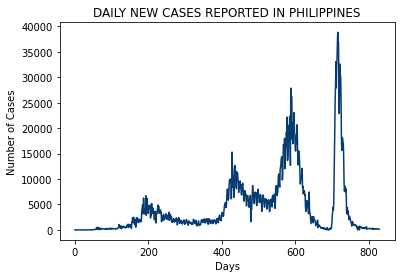

In [13]:
ph_ver = df1.loc[df1['location'] == 'Philippines']

ph_newcases = np.array(ph_ver['new_cases'])

plt.plot(ph_newcases, c='#063c72')
plt.title("DAILY NEW CASES REPORTED IN PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of Cases")

plt.show()

As seen on the figure, the reported daily new cases tends to suddenly rise out of nowhere. The surge even went up to almost 40,000 cases between the 600th and 800th day. As of now, we are experiencing low numbers with regards to the daily reported cases but we'll never know if it'll rise again and record even higher than the current top reported number of cases.

> Now, let's view the daily cases in the world.

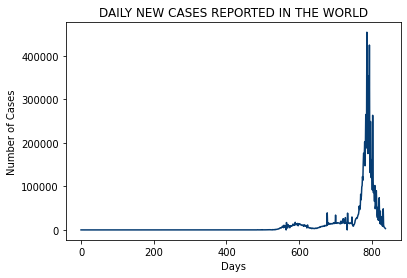

In [14]:
world_ver = df1.loc[df1['location'] == 'World']

world_newcases = np.array(world_ver['new_cases'])

plt.plot(world_newcases, c='#063c72')
plt.title("DAILY NEW CASES REPORTED IN THE WORLD")
plt.xlabel("Days")
plt.ylabel("Number of Cases")

plt.show()

In this case, the world even recorded much higher cases. In this case, the surge happened recently near the 800th day.

> Now, let's compare the two.

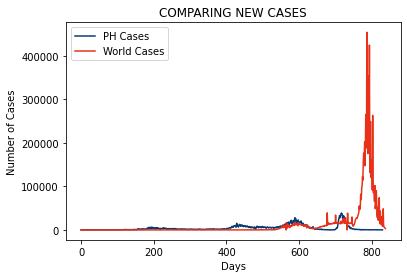

In [15]:
ph_newcases = np.array(ph_ver['new_cases'])
world_newcases = np.array(world_ver['new_cases'])

plt.plot(ph_newcases, c='#063c72', label='PH Cases')
plt.plot(world_newcases, c='#e9311a', label='World Cases')
plt.title("COMPARING NEW CASES")
plt.xlabel("Days")
plt.ylabel("Number of Cases")
plt.legend()

plt.show()

This comparison shows how the reported PH cases contribute to the recorded world cases. It is really far by the numbers which is expected knowing that the world cases is composed of a lot of countries.

> Now that we're done looking at the daily cases in the Philippines and the world, we can now analyze the number of deaths.

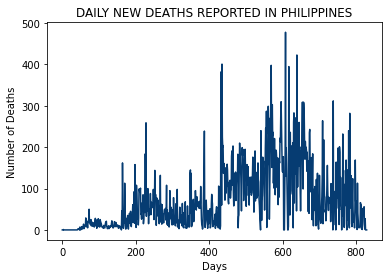

In [16]:
ph_newdeaths = np.array(ph_ver['new_deaths'])

plt.plot(ph_newdeaths, c='#063c72')
plt.title("DAILY NEW DEATHS REPORTED IN PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of Deaths")

plt.show()

The data shows the reported death cases in the Philippines and had a surge in its day-to-day basis documentation. The first surge was at almost 200 number of deaths due to at 400-day of Covid-19 in the Philippines and the surge went down in the next 200 days, as well. The highest number of deaths ranged up to almost 500 deaths at the 600th day. 

> Next, let's analyze the positive rate of the Philippines.

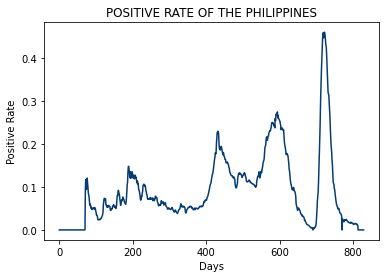

In [17]:
ph_positiverate = np.array(ph_ver['positive_rate'])

plt.plot(ph_positiverate, c='#063c72')
plt.title("POSITIVE RATE OF THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Positive Rate")

plt.show()

This plot shows the positive rate here in our country. If you'll remember the visualization from earlier, we can see that the positive rate has almost the same graph as earlier which is already expected knowing that it is connected to the graph from earlier.

> We can now move on to analyzing the vaccinations in the Philippines.

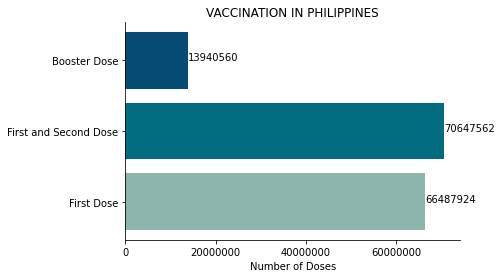

In [18]:
doses = np.array(["First Dose", "First and Second Dose", "Booster Dose"])
values = np.array([66487924, 70647562, 13940560])

fig, ax = plt.subplots()
side1 = ax.spines["top"]
side1.set_visible(False)
side2 = ax.spines["right"]
side2.set_visible(False)

plt.ticklabel_format(style='plain')
plt.locator_params(nbins=4)
c = ['#8db4ad', '#026c80', '#064c72']
plt.barh(doses, values, color = c)

for index, value in enumerate(values):
  plt.text(value, index, str(value))

plt.title("VACCINATION IN PHILIPPINES")
plt.xlabel("Number of Doses")
plt.show()

Looking at this graph, you can see the number of doses administered here in our country, the Philippines. The values here are from the DOH Dashboard as of 9:30 PM of May 26. 

> Now, let's check the percentage of people vaccinated.

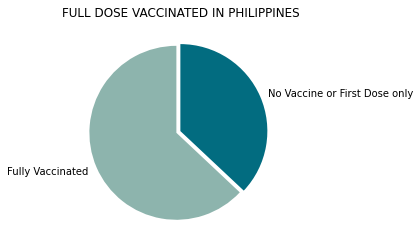

In [19]:
fulldose_value = np.array([63, 37])
label = ["Fully Vaccinated", "No Vaccine or First Dose only"]
dataexplode = [0.05,0]
c = ['#8db4ad', '#026c80']

plt.pie(fulldose_value, labels = label, explode = dataexplode, colors = c, startangle=90)
plt.title("FULL DOSE VACCINATED IN PHILIPPINES")

plt.show()

As seen on the figure, only 63% of individuals are fully vaccinated. And based on the goal of our country which is 80%, we are still 17% away from reaching our goal.

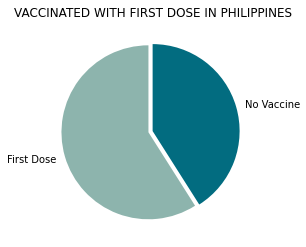

In [20]:
firstdose_value = np.array([59, 41])
label = ["First Dose", "No Vaccine"]
dataexplode = [0.05,0]
c = ['#8db4ad', '#026c80']

plt.pie(firstdose_value, labels = label, explode = dataexplode, colors = c, startangle=90)
plt.title("VACCINATED WITH FIRST DOSE IN PHILIPPINES")

plt.show()

In this figure, at least 59% of people have received their first dose. 

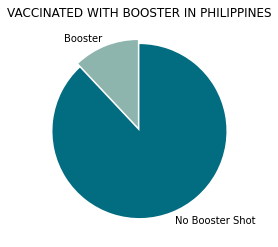

In [21]:
booster = np.array([12, 88])
label = ["Booster", "No Booster Shot"]
dataexplode = [0.05,0]
c = ['#8db4ad', '#026c80']

plt.pie(booster, labels = label, explode = dataexplode, colors = c, startangle=90)
plt.title("VACCINATED WITH BOOSTER IN PHILIPPINES")

plt.show()

Meanwhile, only 12% of individuals have received their booster shots.

> Here are more detailed visualization of the vaccinations here in the Philippines.

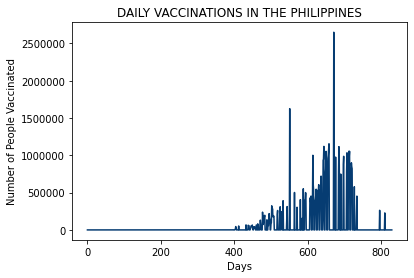

In [22]:
ph_newvaxx = np.array(ph_ver['new_vaccinations'])

plt.ticklabel_format(style='plain')
plt.plot(ph_newvaxx, c='#063c72')
plt.title("DAILY VACCINATIONS IN THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of People Vaccinated")

plt.show()

The figure above shows the trend of the daily vaccinations in the Philippines in an 800-day span. First, it went on for 400 days without any vaccinations and started off with low numbers. It had a surge right before the 600-day period. Then, it reached its peak with a little above 2,500,000 around the 700-day period. We can see that since it started at around the 400-day period, it has gradually progressed around the 700th day period.

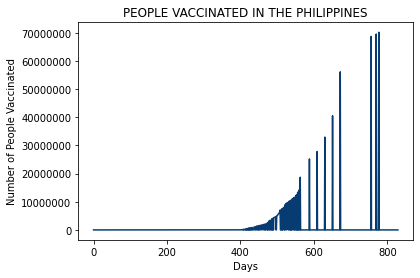

In [23]:
ph_pplvaxx = np.array(ph_ver['people_vaccinated'])

plt.ticklabel_format(style='plain')
plt.plot(ph_pplvaxx, c='#063c72')
plt.title("PEOPLE VACCINATED IN THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of People Vaccinated")

plt.show()

As seen on this figure,there are some inconsistencies regarding the number of people vaccinated. It can either be inconsistency from the dataset or from the records received by the organization.

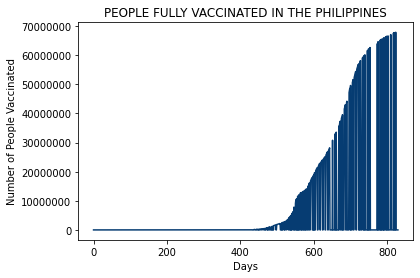

In [24]:
ph_fullyvaxx = np.array(ph_ver['people_fully_vaccinated'])

plt.ticklabel_format(style='plain')
plt.plot(ph_fullyvaxx, c='#063c72')
plt.title("PEOPLE FULLY VACCINATED IN THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of People Vaccinated")

plt.show()

As seen on this plot, there is a constant rise on the amount of individuals fully vaccinated in our country. 

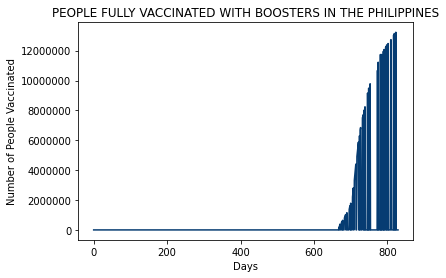

In [25]:
ph_booster = np.array(ph_ver['total_boosters'])

plt.ticklabel_format(style='plain')
plt.plot(ph_booster, c='#063c72')
plt.title("PEOPLE FULLY VACCINATED WITH BOOSTERS IN THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of People Vaccinated")

plt.show()

As also seen on this plot, there is also a constant rise on the amount of individuals fully vaccinated with boosters in our country. 

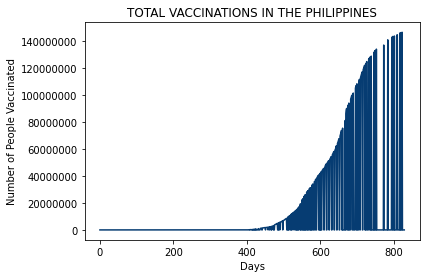

In [26]:
totalvaxx = np.array(ph_ver['total_vaccinations'])

plt.ticklabel_format(style='plain')
plt.plot(totalvaxx, c='#063c72')
plt.title("TOTAL VACCINATIONS IN THE PHILIPPINES")
plt.xlabel("Days")
plt.ylabel("Number of People Vaccinated")

plt.show()

Lastly, there is also a constant rise on the amount of vaccinations in our country. 